In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [5]:
train_v = pd.read_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\training_variants.csv")
test_v = pd.read_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\test_variants.csv")
train_v.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [6]:
train_t = pd.read_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\training_text", sep = "\|\|",header= None, skiprows =1,names=["ID","Text"], engine = 'python')
test_t = pd.read_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\test_text", sep = "\|\|",header= None, skiprows =1,names=["ID","Text"], engine = 'python')
train_t.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
train = pd.merge(train_v, train_t, how = 'left', on = 'ID')

train.head()

x = train.groupby(['Text']).count()
x.sort_values(['ID'], ascending = 0)

plt.figure(figsize=(12,8))
sns.countplot(x = 'Class', data = train,palette="Blues_d")
plt.show()

x = train.groupby(['Gene'])['Gene'].count().sort_values(ascending = False)[:15]

In [8]:
x_train = train_t['Text']
x_test = test_t['Text']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
vect = TfidfVectorizer(min_df=1, token_pattern=r'\w+', strip_accents='unicode',lowercase =True,
analyzer='word', use_idf=True, 
smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vect.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w+', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
x_train_df1 = vect.transform(x_train)
x_test_df1 = vect.transform(x_test)

In [11]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(200)
svd1 = svd.fit(x_train_df1)
x_train_df = svd.transform(x_train_df1)
x_test_df = svd.transform(x_test_df1)
sorted(svd.explained_variance_ratio_)

[0.00097119247036578881,
 0.00098079573602125286,
 0.00098523326303235552,
 0.00099319491443891346,
 0.00099741719839065244,
 0.0010042639466554225,
 0.0010103290533898291,
 0.0010180414646195034,
 0.001027650705561853,
 0.0010311886574124846,
 0.0010342549345952348,
 0.0010431938767974458,
 0.0010539000289042841,
 0.0010570567762254986,
 0.0010623592994604707,
 0.0010731524078335425,
 0.0010782635668680205,
 0.0010831644829443002,
 0.0010932955163736424,
 0.0010945941523469525,
 0.0011020188560137286,
 0.0011093034908835296,
 0.0011200592870887808,
 0.0011282687650331531,
 0.0011361636348945787,
 0.0011443025082773855,
 0.0011519648562765598,
 0.0011579428816575735,
 0.0011617046743428226,
 0.0011739987725300906,
 0.0011850535665079238,
 0.0011863600113502122,
 0.0011904303212483096,
 0.0011977329951920177,
 0.0012006815838726652,
 0.0012131109245333705,
 0.0012155669200906391,
 0.0012231889135057281,
 0.0012289163525083266,
 0.0012326308457130902,
 0.0012535964515301772,
 0.001266830

In [12]:
train_variants_df = train_v.drop(['ID','Class'], axis=1)
y = train_v['Class']
test_variants_df = test_v.drop(['ID'], axis=1)
data = train_variants_df.append(test_variants_df)
x_data = pd.get_dummies(data).values
x = x_data[:train_v.shape[0]]
x_test = x_data[train_v.shape[0]:]

In [13]:
x.shape

(3321, 10116)

In [14]:
import scipy.sparse as ssp
x = ssp.hstack([x,pd.DataFrame(x_train_df)],format = 'csr')
x_test = ssp.hstack([x_test,pd.DataFrame(x_test_df)],format = 'csr')

In [3]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(objective= 'multi:softprob', n_estimators=300, learning_rate=0.05)

In [15]:
y_pred = clf.fit(x,y,eval_metric='mlogloss')

In [20]:
yfinal = clf.predict_proba(x_test)

In [21]:
data_pred = pd.DataFrame(yfinal, columns = ['Class1','Class2','Class3','Class4','Class5','Class6','Class7','Class8','Class9'])

In [22]:
data_pred.index.name = 'ID'

In [26]:
data_pred.to_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\submission4_softmax.csv",index= True)

(3321, 9)

In [19]:
y_pred

array([[  9.49133635e-01,   6.27747132e-03,   2.51696998e-04, ...,
          1.02773998e-02,   1.65280217e-04,   7.85499287e-05],
       [  6.66628182e-02,   4.52038258e-01,   2.29018158e-03, ...,
          1.65275663e-01,   1.22475380e-03,   1.14028284e-03],
       [  6.66628182e-02,   4.52038258e-01,   2.29018158e-03, ...,
          1.65275663e-01,   1.22475380e-03,   1.14028284e-03],
       ..., 
       [  4.00148869e-01,   3.74180526e-01,   2.15837779e-03, ...,
          7.91996568e-02,   1.21140340e-02,   9.22284089e-03],
       [  7.95727000e-02,   9.16477665e-03,   1.83503062e-03, ...,
          1.32127870e-02,   3.32607655e-04,   5.30672842e-04],
       [  6.73668832e-02,   2.19868924e-02,   2.48727598e-03, ...,
          1.29661998e-02,   3.91769601e-04,   4.21566336e-04]], dtype=float32)

In [17]:
yfinal = clf.predict(x_test)
yfinal.shape

(5668,)

In [18]:
sub1 = pd.DataFrame(yfinal,columns = ['Class'])
sub1.index.name = 'ID'
sub1.Class.astype(int)
sub1.iloc[0,0]

7

In [19]:
for i in range(sub1.shape[0]):
    for j in range(9):
        sub1.loc[i,'Class' +  str(j+1)] = 0 
    sub1.loc[i,'Class' +  str(sub1.iloc[i,0])] = 1 

In [20]:
sub1

,Class,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9
ID,,,,,,,,,,
0,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
sub2  = sub1.drop(['Class'], axis = 1)
#sub3 = sub2.rename(columns={"index":'ID'})

In [22]:
sub2

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9
ID,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
#cols = ['ID','Class1','Class2', 'Class3','Class4','Class5','Class6', 'Class7','Class8','Class9']
#sub3.reindex_axis(cols,axis =1)
sub2.to_csv("C:\\Users\\nitesh.garg\\Desktop\\Python\\cancer problem\\submission2.csv",index= True)

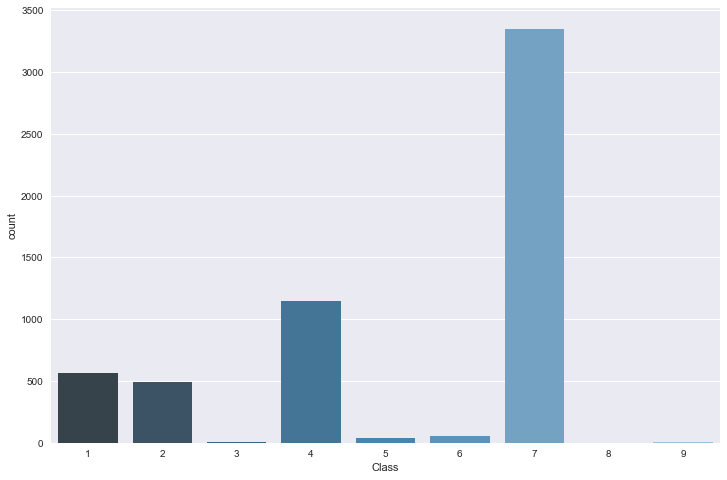

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Class',data = sub1, palette="Blues_d")
plt.show()